In [1]:
#importing necessary modules
import cv2 
import pandas as pd
import numpy as np
import glob

In [2]:
#new dictionary
dic={'letter':[], 'val':[]}


In [3]:
#function to pull data and store into the dictionary
def get_data(i):
    image=[cv2.imread(file) for file in glob.glob('/home/prateek/Desktop/asl-alphabet/asl_alphabet_train/'+i+'/*.jpg')]
    for j in range(len(image)):
                   image[j]=cv2.resize(image[j],(100,100) )
                   image[j]=cv2.Canny(image[j],50,50)
                   image[j]=np.ravel(image[j])
                   dic['letter'].append(i)
                   dic['val'].append(image[j]) 
        

In [4]:
#calling the function
let='A B C D E F G H I J K L M N O P Q R S T U V W X Y Z'
let=let.split(' ')
for l in let:
    get_data(l)

In [5]:
#creating the training and testing models
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dic['val'],dic['letter'],random_state=101)

In [7]:
#importing the random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [8]:
rfc=RandomForestClassifier(n_jobs=-1,warm_start=True,n_estimators=100)

In [9]:
#training the model
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0, warm_start=True)

In [10]:
#testing accuracy
rfc.score(x_test,y_test)

0.8373846153846154

In [35]:
#saving the model as rfc.sav
import pickle
file=('rfc.sav')
pickle.dump(rfc,open(file,'wb'))

In [12]:
loaded=pickle.load(open('rfc.sav','rb'))

In [13]:
import matplotlib.pyplot as pl

array(['H'], dtype='<U1')

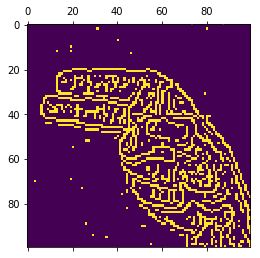

In [47]:
#testing the model with real world data
image=cv2.imread('/home/prateek/Desktop/h2.jpg')
image=cv2.resize(image,(100,100))
image=cv2.Canny(image,50,50)
pl.matshow(image)
image=np.ravel(image)
loaded.predict([image])

In [1]:
pwd

'/home/prateek'